**고객의 금융사용성과 캠페인 성공 관계 **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new_train.csv")

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [4]:
data.drop(['job', 'marital', 'education'], axis = 1, inplace = True)

In [5]:
data.loc[data['y'] == 'yes' , 'y'] = 1
data.loc[data['y'] == 'no' , 'y'] = 0

## Data Preprocessing

In [6]:
data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [7]:
data.isnull().sum() #결측치 없음

age            0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

## EDA

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


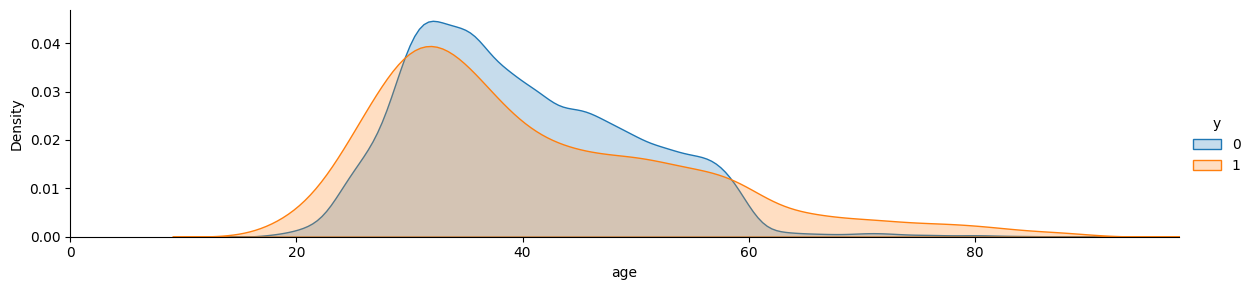

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#나이에 따른 캠페인 성공여부
facet = sns.FacetGrid(data, hue="y", aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, data['age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()


In [9]:
#age 범주화
data.loc[data['age'] < 10, 'age'] = 0
data.loc[(data['age'] >= 10) & (data['age'] < 20), 'age'] = 1 # 10대
data.loc[(data['age'] >= 20) & (data['age'] < 30), 'age'] = 2 # 20대
data.loc[(data['age'] >= 30) & (data['age'] < 40), 'age'] = 3 # 30대
data.loc[(data['age'] >= 40) & (data['age'] < 60), 'age'] = 4 # 40-50대
data.loc[(data['age'] >= 60), 'age'] = 5 # 60대 이상
data['age'] = data['age'].apply(int)

In [10]:
data["age"].value_counts()

4    13941
3    13486
2     4512
5      949
1       62
Name: age, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


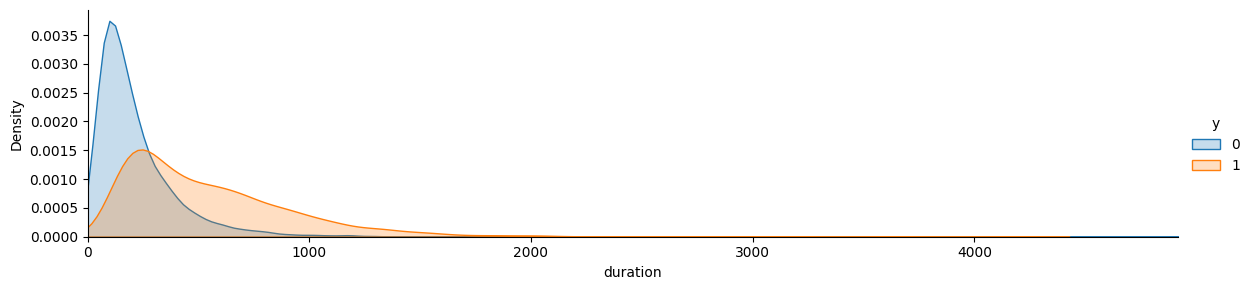

In [11]:
#통화 지속시간에 따른 캠페인 성공여부
facet = sns.FacetGrid(data, hue="y", aspect=4)
facet.map(sns.kdeplot, 'duration', shade=True)
facet.set(xlim=(0, data['duration'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()


In [12]:
data["duration"].value_counts()

90      147
124     139
136     138
85      137
97      133
       ... 
1285      1
2203      1
1848      1
1248      1
1434      1
Name: duration, Length: 1467, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


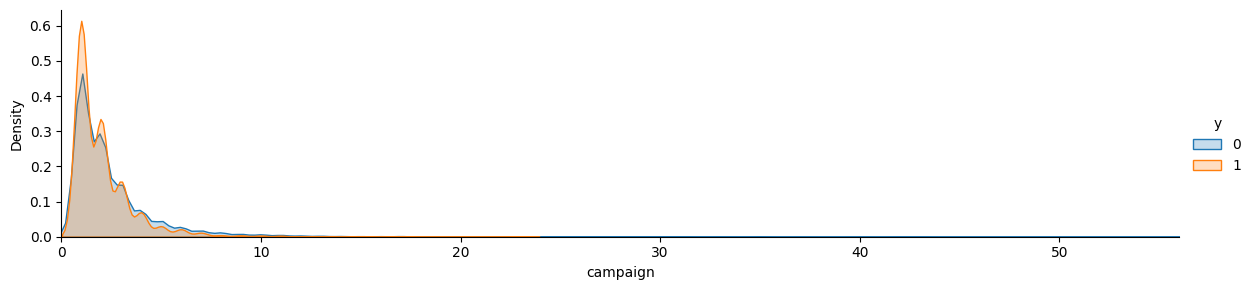

In [13]:
#campaign 에 따른 캠페인 성공 여부 
facet = sns.FacetGrid(data, hue="y", aspect=4)
facet.map(sns.kdeplot, 'campaign', shade=True)
facet.set(xlim=(0, data['campaign'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()


In [14]:
#campaign 범주화

data.loc[data['campaign'] == 1, 'campaign'] = 1 # 1번
data.loc[data['campaign'] == 2, 'campaign'] = 2 # 2번
data.loc[data['campaign'] == 3, 'campaign'] = 3 # 3번
data.loc[data['campaign'] == 4, 'campaign'] = 4 # 4번
data.loc[data['campaign'] >= 5, 'campaign'] = 5 # 5번 이상



In [15]:
data["campaign"].value_counts()

1    14121
2     8469
3     4300
5     3944
4     2116
Name: campaign, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


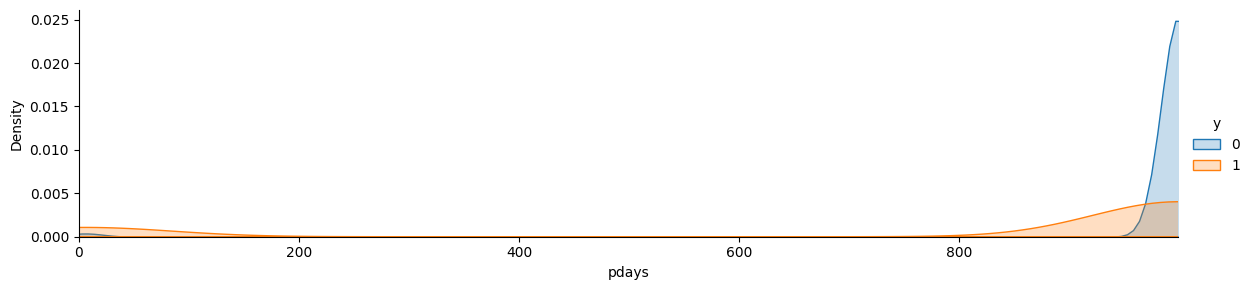

In [16]:
#pdays 따른 캠페인 성공 여부

facet = sns.FacetGrid(data, hue="y", aspect=4)
facet.map(sns.kdeplot, 'pdays', shade=True)
facet.set(xlim=(0, data['pdays'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()


In [17]:
data['pdays'].describe()

count    32950.000000
mean       962.052413
std        187.951096
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [18]:
# pdays 값이 일정 수준 이하면 같은 값(recent)으로 변경경

data.loc[data['pdays'] <= 30 , 'pdays'] = 0  #recent
data.loc[data['pdays'] > 30 , 'pdays'] = 1    #long ago 


In [19]:
data["pdays"].value_counts()

1    31724
0     1226
Name: pdays, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


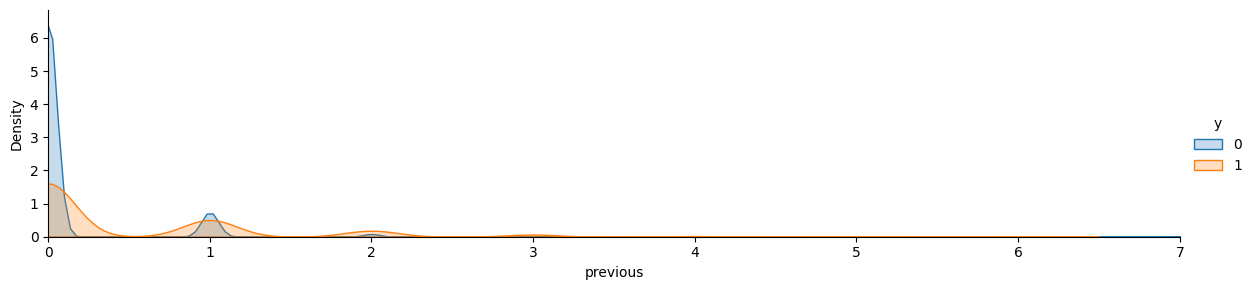

In [20]:
#previous 에 다른 캠페인 성공 여부  

facet = sns.FacetGrid(data, hue="y", aspect=4)
facet.map(sns.kdeplot, 'previous', shade=True)
facet.set(xlim=(0, data['previous'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()


In [21]:
# 특정 feature에 따른 success 비교 (0: 실패, 1: 성공) 함수

def bar_chart(feature):
    success = data[data['y']==1][feature].value_counts()
    fail = data[data['y']== 0][feature].value_counts()
    df_y = pd.DataFrame([success,fail])
    df_y.index = ['success','fail']
    df_y.plot(kind='bar',stacked=True, figsize=(10,5))

default
no         0.128850
unknown    0.052017
yes        0.000000
Name: y, dtype: float64

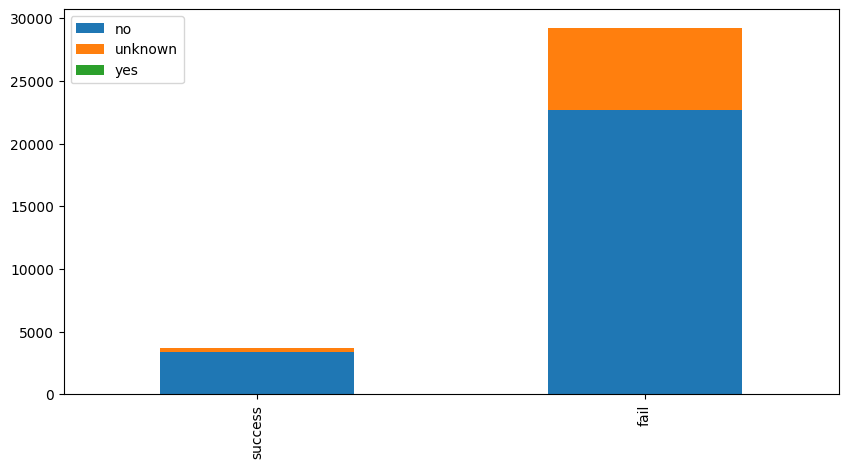

In [22]:
# default 에 따른 success 차이
bar_chart('default') 
data.groupby(['default'])['y'].agg(lambda x: x.sum()/x.count())

housing
no         0.109262
unknown    0.113065
yes        0.115567
Name: y, dtype: float64

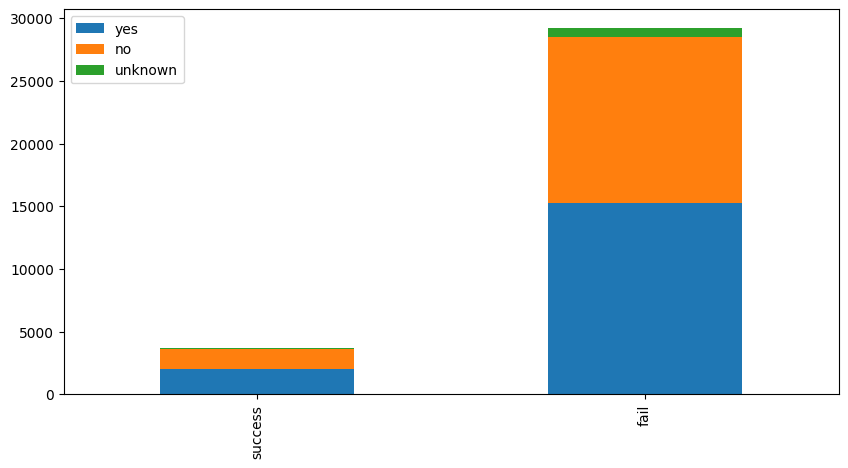

In [23]:
# housing에 따른 success 차이
bar_chart('housing') 
data.groupby(['housing'])['y'].agg(lambda x: x.sum()/x.count())

loan
no         0.112712
unknown    0.113065
yes        0.112283
Name: y, dtype: float64

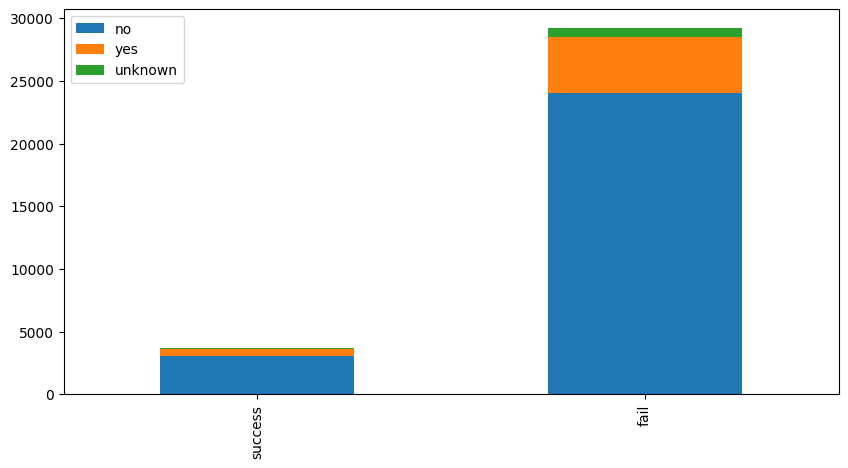

In [24]:
# loan에 따른 success 차이
bar_chart('loan') 
data.groupby(['loan'])['y'].agg(lambda x: x.sum()/x.count())

contact
cellular     0.147025
telephone    0.052981
Name: y, dtype: float64

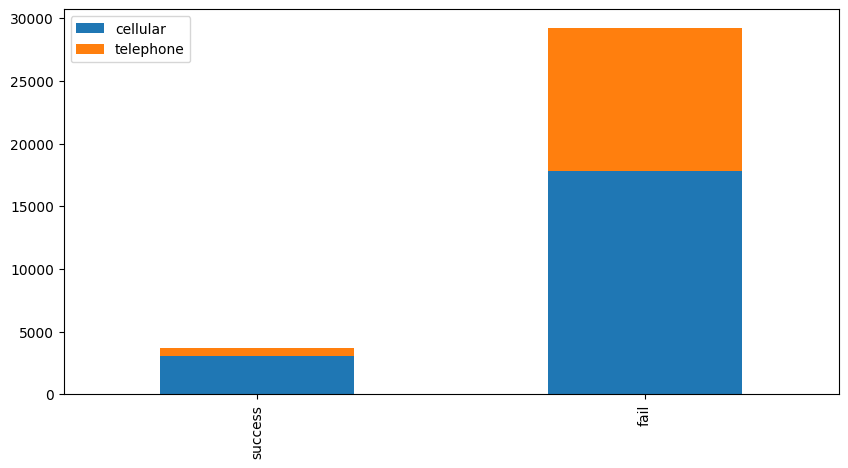

In [25]:
# contact에 따른 success 차이
bar_chart('contact') 
data.groupby(['contact'])['y'].agg(lambda x: x.sum()/x.count())

In [26]:
# month에 따른 success 차이

data.loc[data['month'] == 'jan' , 'month'] = 1  #1분기
data.loc[data['month'] == 'feb'  , 'month'] = 1  #1분기
data.loc[data['month'] ==  'mar' , 'month'] = 1  #1분기

data.loc[data['month'] == 'apr' , 'month'] = 2  #2분기
data.loc[data['month'] == 'may' , 'month'] = 2  #2분기
data.loc[data['month'] == 'jun' , 'month'] = 2  #2분기

data.loc[data['month'] == 'jul'  , 'month'] = 3  #3분기
data.loc[data['month'] == 'aug'  , 'month'] = 3  #3분기
data.loc[data['month'] == 'sep'  , 'month'] = 3  #3분기

data.loc[data['month'] == 'oct', 'month'] = 4  #4분기기
data.loc[data['month'] == 'nov', 'month'] = 4  #4분기기
data.loc[data['month'] == 'dec', 'month'] = 4  #4분기기




month
1    0.497706
2    0.090353
3    0.113647
4    0.164665
Name: y, dtype: float64

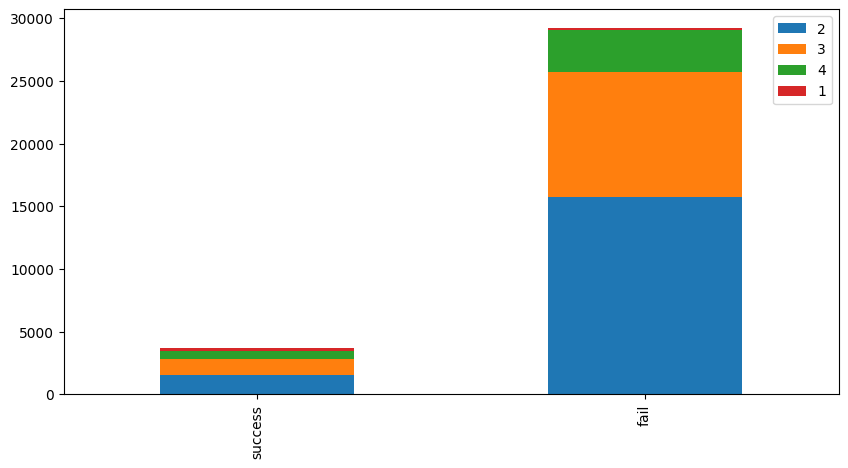

In [27]:
bar_chart('month') 
data.groupby(['month'])['y'].agg(lambda x: x.sum()/x.count())

In [28]:
#유의미하다고 생각되는 column 선택
data = data[['duration','default','contact','month','previous','y']]
data

,duration,default,contact,month,previous,y
0,227,unknown,cellular,4,0,0
1,202,no,telephone,4,1,0
2,1148,no,cellular,3,0,1
3,120,no,telephone,2,0,0
4,368,no,cellular,2,0,0
...,...,...,...,...,...,...
32945,192,no,cellular,3,0,0
32946,64,no,cellular,4,1,0
32947,131,no,cellular,3,0,0
32948,165,no,telephone,2,0,0


In [29]:
data.loc[data['contact'] == 'cellular' , 'contact'] = 1  
data.loc[data['contact']== 'telephone' , 'contact'] = 2

In [30]:
data.loc[data['default'] == 'no' , 'default'] = 0
data.loc[data['default']== 'yes' , 'default'] = 1
data.loc[data['default']== 'unknown' , 'default'] = 2

In [31]:
data.columns

Index(['duration', 'default', 'contact', 'month', 'previous', 'y'], dtype='object')

In [32]:
#다중공산성 확인

def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    df = df.astype(float)
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(data)

,variables,VIF
0,duration,2.341763
1,default,1.301769
2,contact,4.613792
3,month,4.764993
4,previous,1.201810
5,y,1.444089


## Logistic regression

In [33]:
data = data.astype(int)
train_features = data[['duration','default','contact','month','previous']]
train_target = data['y']
train_target = train_target.astype('int') #모델 실행시 데이터 타입 차이로 인한 오류 방지

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_features, train_target, test_size = 0.2, random_state = 312)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 312, stratify=y_train)
print("train set:",x_train.shape)
print("valid set:",x_valid.shape)
print("test set:",x_test.shape)
print("train set:",y_train.shape)
print("valid set:",y_valid.shape)
print("test set:",y_test.shape)

train set: (21088, 5)
valid set: (5272, 5)
test set: (6590, 5)
train set: (21088,)
valid set: (5272,)
test set: (6590,)


In [35]:
y_train.value_counts() 

0    18688
1     2400
Name: y, dtype: int64

In [36]:
from imblearn.under_sampling import RandomUnderSampler
x_train, y_train = RandomUnderSampler(random_state=312, sampling_strategy='majority').fit_resample(x_train, y_train)

In [37]:
y_train.value_counts()

0    2400
1    2400
Name: y, dtype: int64

In [38]:
# statsmodel에는 constant가 자동으로 생기지 않아 직접 추가하여야 함
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
x_valid = sm.add_constant(x_valid)
x_test = sm.add_constant(x_test)

In [39]:
model_sm = sm.Logit(y_train, x_train).fit()
# model_sm = smf.logit("y 변수명 ~ X변수1 + X변수2", data=데이터프레임).fit()의 형태로도 fit 가능

# maximum likelihood를 사용하는 과정에서 loss function이 최소화 되도록 coeff. 값을 수정하게 되는데, 베타값이 converge 할 수 있도록 iteration을 돌리는데 몇변 돌렸는지 표시해줌

Optimization terminated successfully.
         Current function value: 0.465457
         Iterations 7


## Evaluation

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
# Probability 값
predict_prob = model_sm.predict(x_valid)

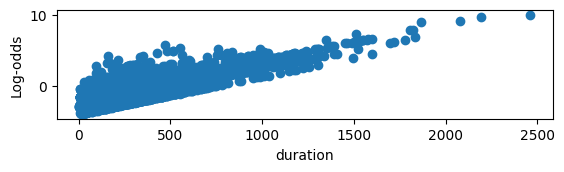

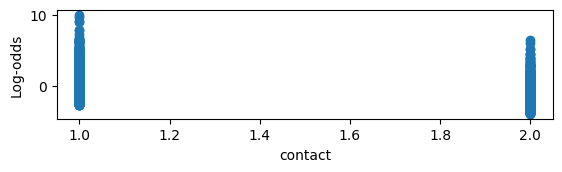

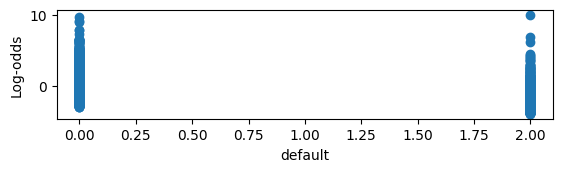

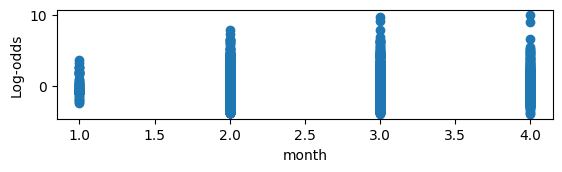

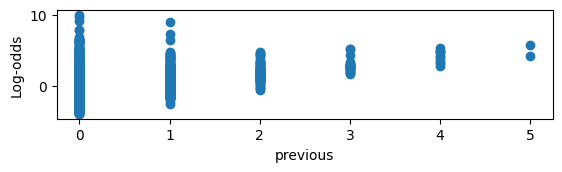

In [42]:
import numpy as np
# Getting log odds values
log_odds = np.log(predict_prob / (1 - predict_prob))

# np.log (성공할 확률 / 실패할 확률)
# Visualize predictor variable vs logit values for duration
plt.subplot(311)
plt.scatter(x=x_valid['duration'].values, y=log_odds)
plt.xlabel("duration")
plt.ylabel("Log-odds")
plt.show()
 
# 독립변수(contact)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['contact'].values, y=log_odds)
plt.xlabel("contact")
plt.ylabel("Log-odds")
plt.show()

# 독립변수(default)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['default'].values, y=log_odds)
plt.xlabel("default")
plt.ylabel("Log-odds")
plt.show()

# 독립변수(month)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['month'].values, y=log_odds)
plt.xlabel("month")
plt.ylabel("Log-odds")
plt.show()

# 독립변수(previous)와 log odd간의 관계 시각화
plt.subplot(312)
plt.scatter(x=x_valid['previous'].values, y=log_odds)
plt.xlabel("previous")
plt.ylabel("Log-odds")
plt.show()

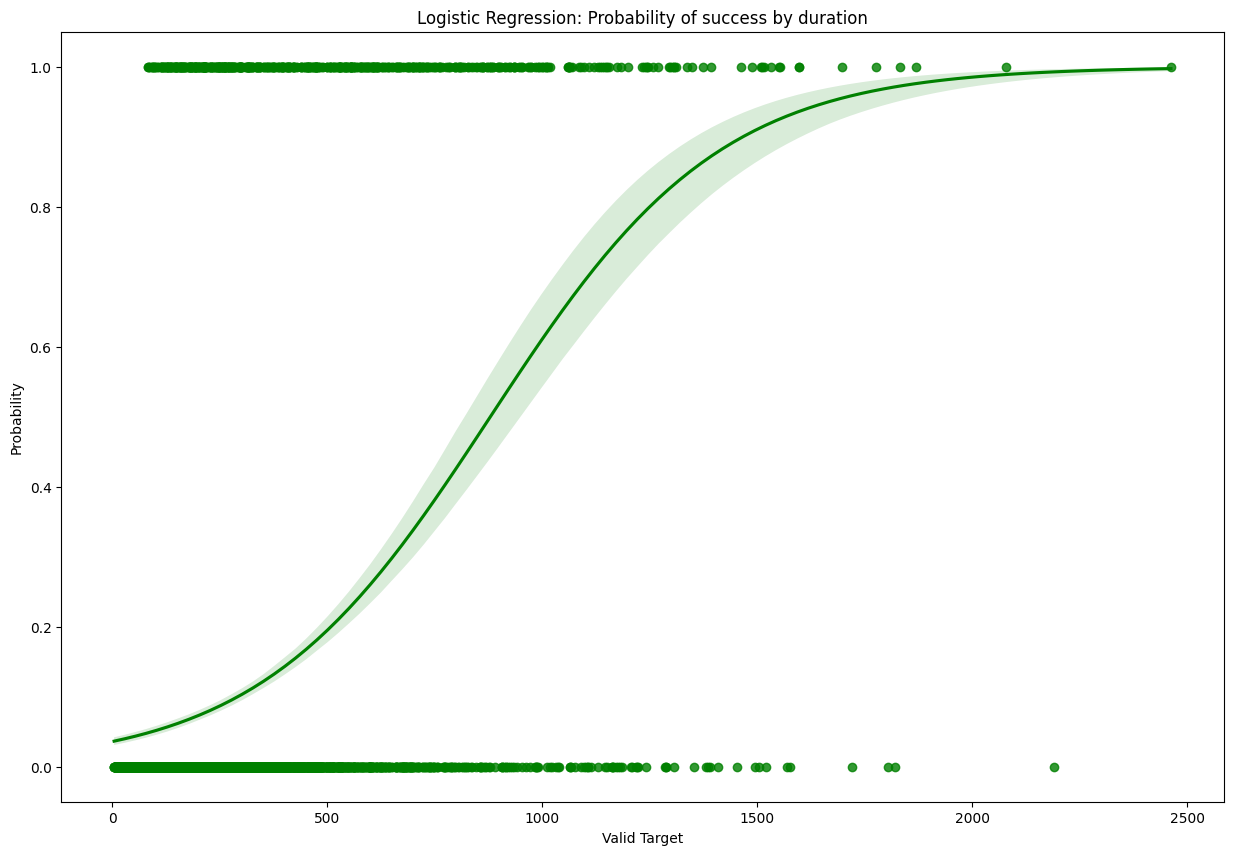

In [43]:
def ap_log_regplot(ap_X, ap_y):
    plt.figure(figsize=(15,10))
    sns.regplot(x=ap_X, y=ap_y, logistic=True, color='green')
    return None

ap_log_regplot(x_valid['duration'], y_valid)
plt.xlabel('Valid Target')
plt.ylabel('Probability')
plt.title('Logistic Regression: Probability of success by duration')
plt.show()


In [44]:
# 경계값cut off value에 따라 0,1 값 변환
# cut off value = 모델에서 positive 클래스로 분류될 확률 값의 기준. 이진 분류에서 활용
## decision boundary = 클래스를 분리하는 경계선. 이진 및 다중 분류에서 활용
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

In [45]:
print(confusion_matrix(y_valid, change_cutoff(predict_prob, 0.5)))
tn, fp, fn, tp = confusion_matrix(y_valid, change_cutoff(predict_prob, 0.5)).ravel()

specificity = tn / (tn + fp)

print(" Accuracy:", accuracy_score(y_valid, change_cutoff(predict_prob, 0.5)))
print("Specificity:", specificity)
print("Precision:", precision_score(y_valid, change_cutoff(predict_prob, 0.5)))
print("   Recall:", recall_score(y_valid, change_cutoff(predict_prob, 0.5)))
print(" F1 score:", f1_score(y_valid, change_cutoff(predict_prob, 0.5)))

[[3840  832]
 [ 140  460]]
 Accuracy: 0.8156297420333839
Specificity: 0.821917808219178
Precision: 0.3560371517027864
   Recall: 0.7666666666666667
 F1 score: 0.48625792811839325


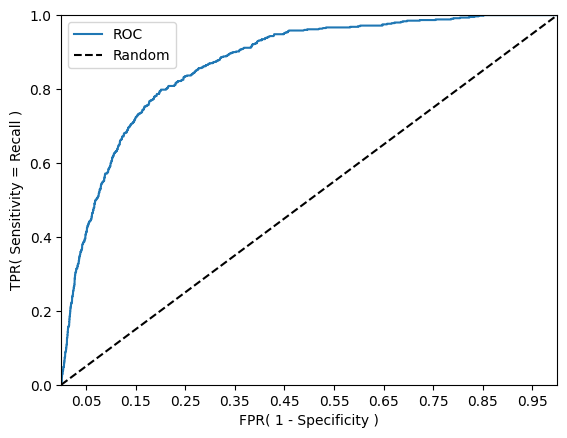

In [46]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1) # 임곗값에 따른 FPR, TPR 값을 반환 받음. 

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )')
    plt.ylabel('TPR( Sensitivity = Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_valid, predict_prob)

#좌측 상단에 밀접한 그래프가 나올수록 결과가 잘 나온 것임

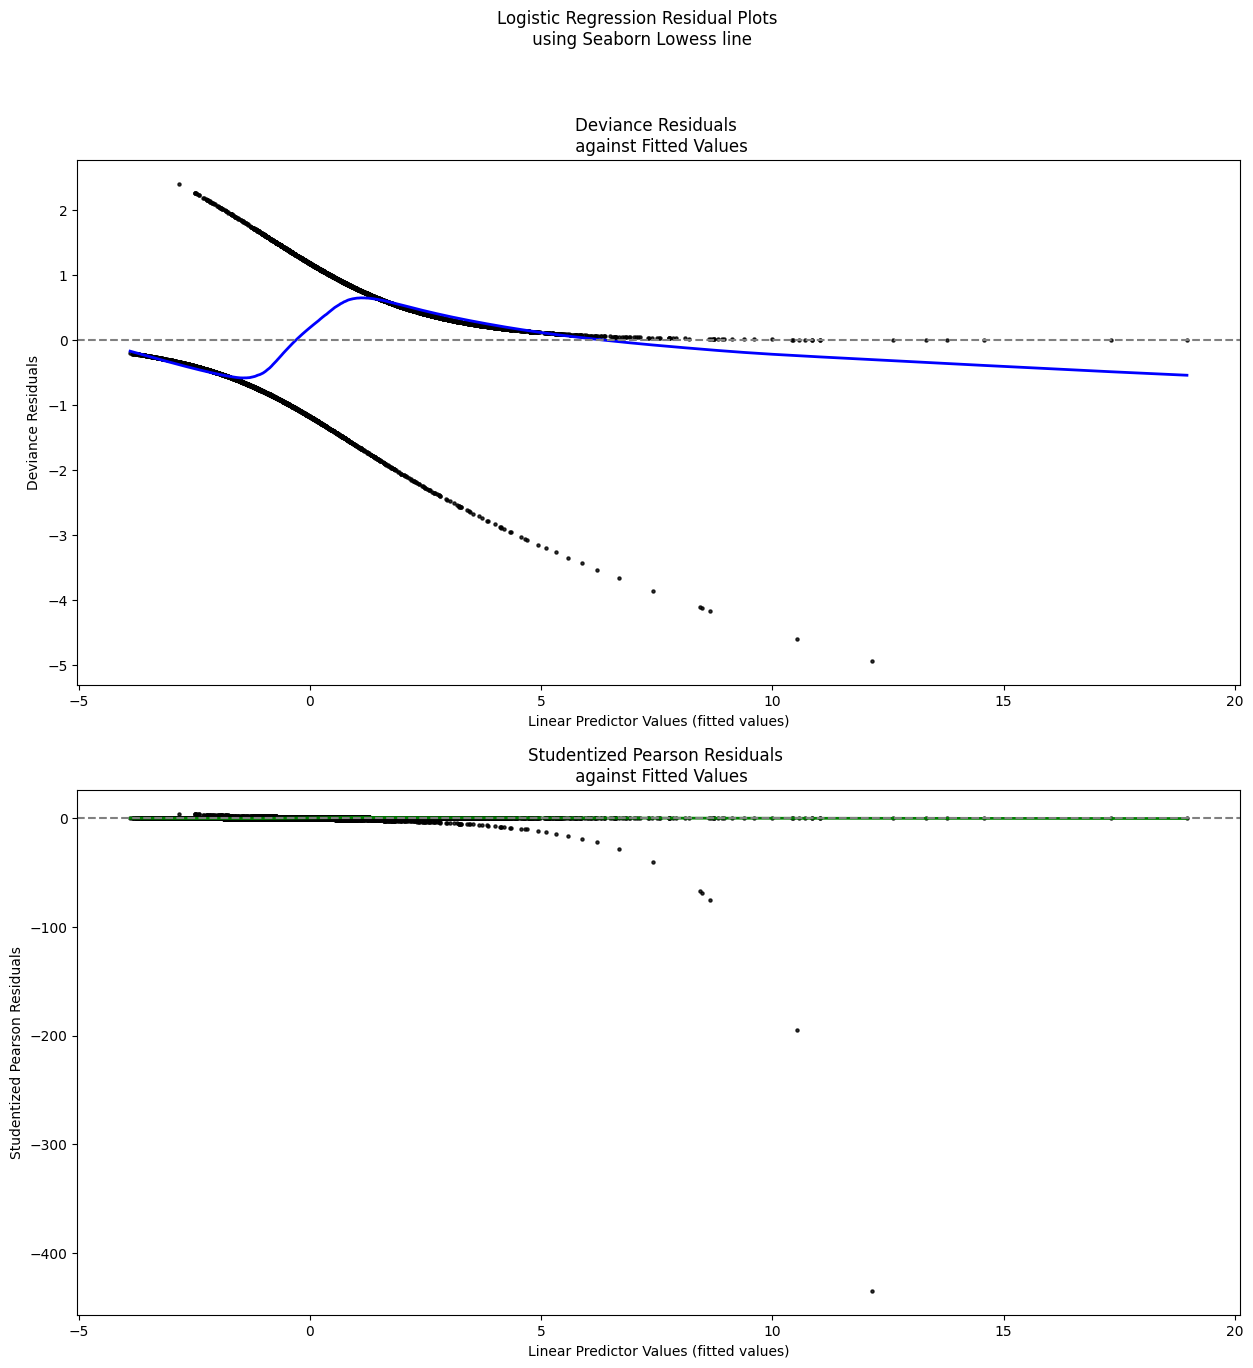

In [47]:

## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line")

# Deviance Residuals
sns.regplot(x=model_sm.fittedvalues, y=model_sm.resid_dev, ax=axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values (fitted values)")
axL.set_ylabel("Deviance Residuals")
axL.axhline(y=0, linestyle='--', color='grey')

# Studentized Pearson Residuals
sns.regplot(x=model_sm.fittedvalues, y=model_sm.resid_pearson, ax=axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values (fitted values)")
axR.set_ylabel("Studentized Pearson Residuals")
axR.axhline(y=0, linestyle='--', color='grey')
plt.show()

In [48]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4800
Model:                          Logit   Df Residuals:                     4794
Method:                           MLE   Df Model:                            5
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                  0.3285
Time:                        07:25:21   Log-Likelihood:                -2234.2
converged:                       True   LL-Null:                       -3327.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0889      0.196     -0.453      0.650      -0.473       0.296
duration       0.0052      0.000     28.837      0.000       0.005       0.006
default       -0.5411      0.058     -9.360      0.000      -0.654      -0.428
contact       -1.2452      0.095    -13.167      0.000      -1.431      -1.060
month         -0.1014      0.048     -2.116      0.034      -0.195      -0.007
previous       1.0011      0.069     14.479      0.000       0.866       1.137
==============================================================================
"""

In [49]:
model_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.328    
Dependent Variable: y                AIC:              4480.3840
Date:               2023-04-22 07:25 BIC:              4519.2422
No. Observations:   4800             Log-Likelihood:   -2234.2  
Df Model:           5                LL-Null:          -3327.1  
Df Residuals:       4794             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const       -0.0889    0.1962   -0.4532  0.6504  -0.4735   0.2956
duration     0.0052    0.0002   28.8367  0.0000   0.0048   0.0056
default     -0.5411    0.0578   -9.3600  0.0000  -0.6544  -0.4278
contact     -1.2452    0.0946  -13.1668  0.0000  -1.4305  -1.0598
month       -0.1014    0.0479   -2.1158  0.0344  -0.1954  -0.0075
previous     1.0011    0.0691   14.4790  0.0000   0.8656   1.1366
================================================================

"""

In [50]:
# Odds ratio
import numpy as np
np.exp(model_sm.params)

# log odd여서 exp 취해줘야 함

const       0.914912
duration    1.005216
default     0.582126
contact     0.287896
month       0.903547
previous    2.721197
dtype: float64